In [2]:
import torch
import matplotlib.pyplot as plt
from math import pi

In [36]:
s = 5
def f(x):
    return torch.exp(-x**2/2/s)/(2*pi * s)**.5

def transform(w):
    return torch.exp(- 2 * pi**2 * s * w**2)

In [26]:
torch.set_printoptions(precision=3,sci_mode=False)

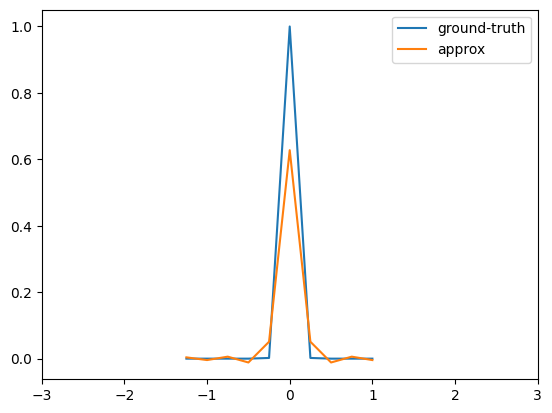

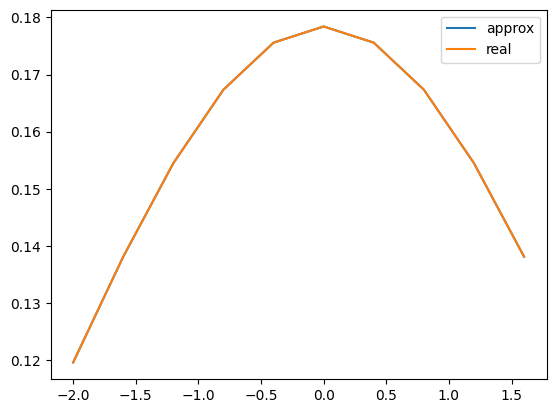

In [40]:
lx = 4.
m = 10
dx = lx/m
dw = 1/lx
lw = m / (2 * lx)
idx = torch.arange(-m/2,m/2)
pts =  idx * dx
freq_pts = idx * dw
pts = torch.fft.ifftshift(pts)
fft = torch.fft.fft(f(pts)) * dx # Multiply by dx to get the right thing
plt.xlim([-3,3])
plt.plot(freq_pts, transform(freq_pts))
plt.plot(freq_pts,torch.fft.fftshift(fft))
plt.legend(['ground-truth','approx'])
plt.show()

def app_f(x):
    r = 0
    for k in idx:
        k = k.long().item()
        exp = torch.view_as_complex(torch.tensor([0., 2 * pi * dw * k * x]))
        r = r + fft[k] * torch.exp (exp)
    return r * dw

pts = torch.fft.fftshift(pts)
vals = torch.zeros_like(pts)
for i, pt in enumerate(pts):
    vals[i] = torch.abs(app_f(pt).real)

plt.plot(pts, vals)
plt.plot(pts, f(pts))
plt.legend(['approx','real'])
plt.show()